Veri de bilinmesi gerekenler;

track_id : şarkı Id

track_name: şarkı adı

acousticness : AKUSTİKLİK

danceability : DANS EDİLEBİLİRLİK	

duration ms	: süre (ms)	

energy	: enerji

instrumentalness key : enstrümantalite anahtarı 

liveness :	canlılık

loudness : ses yüksekliği

mode: modu

speechiness	: konuşkanlık

tempo: tempo

time signature: zaman imzası

valence: değerlik

popularity:Popülerlik



Aşağıdaki hedefler baz alınarak, gerekli analizler yapılmıştır:

-En popüler 5 sanatçı

-En gürültülü 5 parça

-En çok dans edilebilen şarkıya sahip sanatçı

-En iyi 10 enstrümental parça

-70'ten fazla popülariteye sahip parçaların akustikliği..



In [1]:
import numpy as np 
import pandas as pd
from Yardım.EDA import *

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import Data 

In [2]:
data=pd.read_csv('SpotifyFeatures.csv')

data.sample(10)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
112069,ØDYSSEE,1hOA6mHncd5IDa3z7mVa1r,Poolside,0.21200,0.723,87919,0.725,0.020000,9,0.1030,-4.610,0,0.0368,87.405,4,0.547,33
6089,Mr. Don,6UFXvxIh66cbuA0FScQTv4,I Believe,0.40300,0.748,210965,0.711,0.002160,7,0.1040,-5.645,1,0.0262,130.006,4,0.715,41
4174,One Kahleo,1Nx9JeLG0IlBOOcKEOzQZp,Fred Hampton,0.04310,0.535,218751,0.792,0.000464,10,0.0801,-5.423,0,0.4520,172.349,4,0.589,0
101665,Lil Peep,2v5JTeM6hSmi5wWy7jiwrI,I've Been Waiting (w/ ILoveMakonnen & Fall Out...,0.15000,0.741,233613,0.845,0.000000,5,0.1740,-3.568,0,0.0381,129.939,4,0.926,84
28600,Ufo361,4RNVu6nVWfHD8eeCcfmQ9t,Odio,0.00817,0.782,217416,0.529,0.031500,1,0.1520,-7.189,1,0.1410,140.024,4,0.119,53
111896,The Kinks,0kv7wE29MbcjyGCopbx08S,Misty Water - Mono Mix; 2018 Remaster,0.13100,0.684,190134,0.598,0.000000,0,0.1180,-7.700,1,0.0442,133.924,4,0.710,2
64899,Jam Dropper,39RAwYVB7jmAOZ1yjoRgFW,The Reliable Canticle,0.17800,0.574,86335,0.326,0.866000,7,0.1910,-12.604,1,0.0266,89.042,4,0.478,0
37831,Jordy Searcy,36siPVCyUOZf7Am5SYMUT6,Jenny (Live),0.32400,0.589,266405,0.341,0.000000,1,0.1170,-10.332,1,0.0648,91.351,4,0.508,31
57363,Aether,1cfvkOU8VNGT6BwQs3Kp7G,Floresence,0.91800,0.549,169060,0.302,0.920000,9,0.0957,-12.971,0,0.0437,127.008,3,0.195,23
128914,Leslie Odom Jr.,7eaOsEltlTILXKjKi0HCY8,What Are We Waiting For (feat. Nicolette Robin...,0.89700,0.245,204520,0.259,0.000000,2,0.1280,-9.727,1,0.0281,81.044,3,0.193,46


In [3]:
#verinin sutunlarının temel özellikleri ve sutun veri tiplerini görme
DescribeData(data)

                     count           mean            std     min          25%  \
acousticness      130663.0       0.342500       0.345641     0.0       0.0316   
danceability      130663.0       0.581468       0.190077     0.0       0.4590   
duration_ms       130663.0  212633.124098  123155.064847  3203.0  163922.5000   
energy            130663.0       0.569196       0.260312     0.0       0.3960   
instrumentalness  130663.0       0.224018       0.360328     0.0       0.0000   
key               130663.0       5.231894       3.602701     0.0       2.0000   
liveness          130663.0       0.194886       0.167733     0.0       0.0975   
loudness          130663.0      -9.974006       6.544379   -60.0     -11.8980   
mode              130663.0       0.607739       0.488256     0.0       0.0000   
speechiness       130663.0       0.112015       0.124327     0.0       0.0389   
tempo             130663.0     119.473353      30.159636     0.0      96.0140   
time_signature    130663.0  

In [4]:
#NaN değerlerin kontrolü varsa bunların kolonlara oranı
controlNaNvalues(data)

artist_name         0
track_id            0
track_name          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64
-----



In [5]:
#Gereksiz kolonlardan kurtulma: 
data.drop('track_id',axis=1,inplace=True)

data.tail(4)

,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
130659,Saint Claire,Enough for You,0.9180,0.387,194583,0.249,0.0,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,Do It,0.3300,0.717,139191,0.532,0.0,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,No Smoke,0.0079,0.772,180013,0.510,0.0,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50
130662,Banda Los Sebastianes,En Vida,0.5490,0.715,145827,0.734,0.0,3,0.1080,-3.244,1,0.0367,130.128,3,0.9760,55


## EDA 

In [6]:
#En popüler 5 sanatçı demişiz ancak, aşağıdaki dataFrame'de Post Malone'dan iki tane bulunmakta.
data.sort_values(by='popularity',ascending=False)[:5]

,artist_name,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
99393,Daddy Yankee,Con Calma,0.1100,0.737,193227,0.860,0.000002,8,0.0574,-2.652,0,0.0593,93.989,4,0.656,100
99364,Post Malone,Wow.,0.1630,0.833,149520,0.539,0.000002,11,0.1010,-7.399,0,0.1780,99.947,4,0.385,98
99368,Billie Eilish,bad guy,0.3080,0.708,194088,0.418,0.093000,0,0.1000,-10.998,1,0.3680,131.926,4,0.578,98
123909,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,0.5200,0.744,158040,0.494,0.000000,2,0.0716,-5.563,1,0.0699,89.972,4,0.927,98
99366,Jonas Brothers,Sucker,0.0427,0.842,181040,0.734,0.000000,1,0.1060,-5.065,0,0.0588,137.958,4,0.952,98


['Daddy Yankee', 'Post Malone', 'Billie Eilish', 'Post Malone', 'Jonas Brothers', 'Ariana Grande']


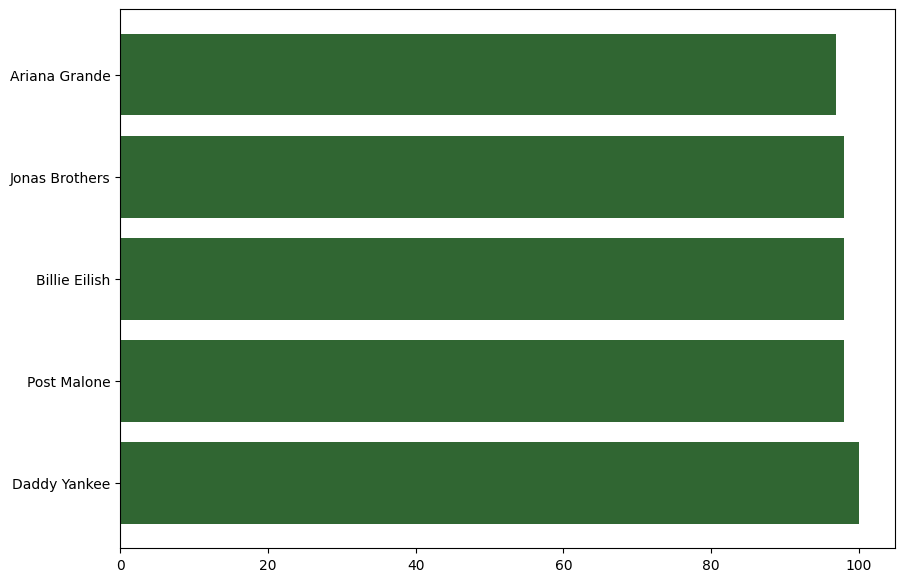

In [8]:
#En popüler 5 sanatçı,
PopularBarPlot(data,6)

Story-Telling kısmı;
Örneğin bir firma şirketi yeni bir star yaratmaya çalışıyor ve bu starı istastiksel temele dayandırarak veri biliminden faydalanmak için bize başvurdu.